#Mileage Prediction Using Regression Analysis

**source:**

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

**Data Set Information**

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

**Attribute Information:**

1. mpg: continuous

2. cylinders: multi-valued discrete

3. displacement: continuous

4. horsepower: continuous

5. weight: continuous

6. acceleration: continuous

7. model year: multi-valued discrete

8. origin: multi-valued discrete

9. car name: string (unique for each instance)

#Import library

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import Data

In [70]:
df = pd.read_csv('/content/auto-mpg.csv')

In [71]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [72]:
df.shape

(398, 9)

In [73]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


**Observation:**

Here the variable horsepower is not there though the horsepower variable is continious but still the describe is not showing values need to check whats wrong

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [75]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [76]:
df['horsepower'] = df['horsepower'].replace('?',np.nan)

In [77]:
df['horsepower'].isnull().sum()

6

6 values got replaced as nan in horsepower variable

convert the horsepower variable to float and fill the nan values with median value of horsepower

In [78]:
df['horsepower'] = df['horsepower'].astype('float')

In [79]:
# fill the nan values with median values
df['horsepower']=df['horsepower'].fillna(df['horsepower'].median())

In [80]:
df['horsepower'].isnull().sum()

0

In [81]:
df.corr()

<ipython-input-81-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


#Data Visualization

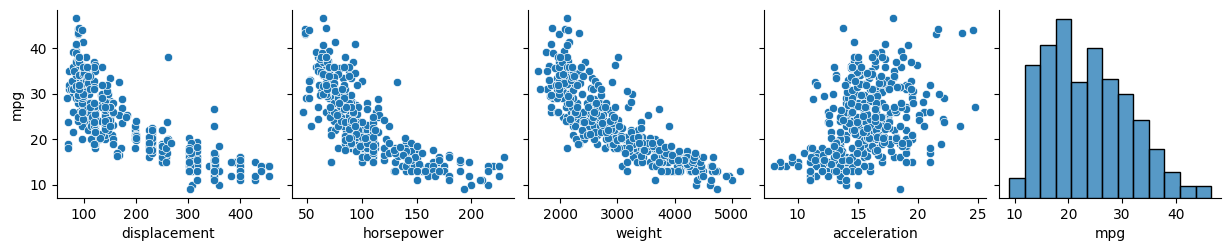

In [82]:
sns.pairplot(df,x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars='mpg')

<Axes: xlabel='displacement', ylabel='mpg'>

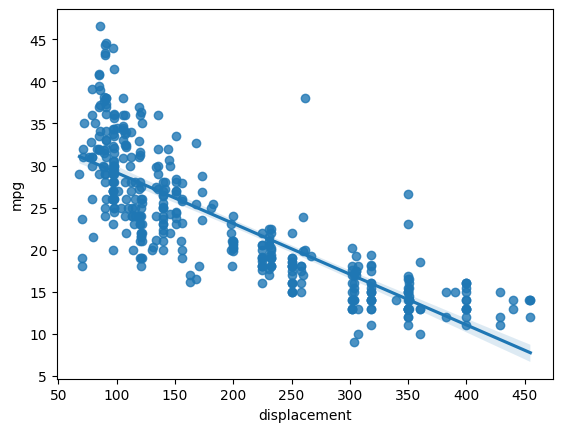

In [83]:
sns.regplot(x='displacement',y='mpg',data=df)

#Define Target Variable (y) and Feature Variables (X)

In [84]:
df=df.drop(['car name','model year', 'origin'],axis=1)

In [86]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration'],
      dtype='object')

In [87]:
y = df['mpg']

In [88]:
X = df[['cylinders','displacement','horsepower','weight','acceleration']]

In [89]:
y.shape

(398,)

In [90]:
X.shape

(398, 5)

In [91]:
X

,cylinders,displacement,horsepower,weight,acceleration
0,8,307.0,130.0,3504,12.0
1,8,350.0,165.0,3693,11.5
2,8,318.0,150.0,3436,11.0
3,8,304.0,150.0,3433,12.0
4,8,302.0,140.0,3449,10.5
...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6
394,4,97.0,52.0,2130,24.6
395,4,135.0,84.0,2295,11.6
396,4,120.0,79.0,2625,18.6


#Train Test Split

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size = 0.3,random_state=101)

#Linear Regression Model

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
linear_model = LinearRegression()

In [96]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [97]:
test_predictions = linear_model.predict(X_test)

#Prediction

In [98]:
test_predictions

array([27.95359611, 22.84841721, 30.24168772,  9.95771734, 13.33281989,
       25.76800741, 30.33679578, 25.6250357 , 32.63395132, 26.86433666,
       24.05208707, 25.24638128, 30.45260691, 31.81882789, 12.9657296 ,
       16.32026717, 22.5536083 , 21.81864224, 27.89845284, 28.28423905,
       10.67982889, 21.86131378, 30.84060053, 16.67755096, 14.10679932,
       32.68954282, 28.2127351 , 27.68327706, 16.86740696,  9.78100155,
       19.39539517, 30.86531975, 26.01462476, 28.8796852 , 25.34814073,
       13.46058865, 29.06362881, 28.50331035, 16.34450012, 28.52833433,
       30.01488675, 16.89545773, 29.84819017, 15.63453265, 18.1042698 ,
       22.032345  , 29.59659667, 24.74544642, 17.63653501, 31.45883453,
       24.2307975 , 20.50460112, 24.02254007, 26.29571798, 18.73658887,
       25.20119505, 30.81131649, 30.56600691, 19.45817681, 32.04270024,
       27.91868558, 29.94305512, 30.94537929, 19.67616746, 20.13142006,
       22.91826139, 30.66634945, 31.26369935, 12.33210887, 14.49

In [100]:
## predicting the mileage values for new values
# cylinder=8,displacement=206,horsepower=200,weight=1900,aceleration=12.0
values=[[8,206,200,1900,12.0]]
new_mileage=linear_model.predict(values)
print('predicted new mileage for above values is %1.3f'%new_mileage)

predicted new mileage for above values is 22.655


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#Model Accuracy

In [101]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [102]:
MAE = mean_absolute_error(y_test,test_predictions)
MAE

3.1497994647872862

In [103]:
MSE = mean_squared_error(y_test,test_predictions)
MSE

17.93199996894413

In [104]:
r2_score(y_test,test_predictions)

0.7138802058039551